<h3>Predicting Rental Prices</h3>

In [2]:
%load_ext autoreload
%autoreload 2

import lib, data, model
import graphs as gr
 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<h5>Part 1: Load the cleaned data</h5>

Including feature engineering
- identify the student properties by spotting the word "student" in description

In [3]:
df = data.cleanBBData()

In [3]:
# df[df.duplicated('listing_id', keep = 'first')]

In [23]:
df.head(3).T

,0,1,2
bills_included,0,0,0
description,St James's Square is the prime Grade I Listed ...,Seven bedroom student property located on Chel...,Property Reference: 692630.Key FeaturesHigh Qu...
details_url,https://www.zoopla.co.uk/to-rent/details/51435...,https://www.zoopla.co.uk/to-rent/details/53267...,https://www.zoopla.co.uk/to-rent/details/53826...
first_published_date,2019-12-06 12:30:57,2019-11-07 16:37:46,2020-01-01 20:23:31
floor_plan,1,1,0
furnished_state,unfurnished,furnished,furnished
latitude,51.3889,51.3853,51.3987
listing_id,51435492,53267805,53826970
longitude,-2.36887,-2.38896,-2.33808
num_bathrooms,4,0,4


<h4>Part 2: EDA</h4>

In [5]:
# df[(df['num_bedrooms']==0) & (df['property_type']!='Studio')]
df.at[199, 'num_bedrooms'] = 6
df.at[199, 'num_bathrooms'] = 2

In [6]:
import warnings
warnings.filterwarnings('ignore')

# focusing on student lettings
student = data.getStudentRentals(df)

In [7]:
# BA2_rented = BA2_stud[(BA2_stud['rented']==1)]
# BA2_non_rented = BA2_stud[(BA2_stud['rented']==0)]
student.describe()

,bills_included,floor_plan,latitude,listing_id,longitude,num_bathrooms,num_bedrooms,num_recepts,rent_price,shared_occu,student,rented,room_pm
count,675.000000,675.000000,675.000000,6.750000e+02,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.0,675.000000,675.000000
mean,0.100741,0.137778,51.443043,5.208150e+07,-2.541829,0.856296,3.662222,0.525926,2028.586667,0.026667,1.0,0.253333,569.137778
std,0.301208,0.344922,0.041231,3.049753e+06,0.095477,1.022783,2.147038,0.589594,984.659175,0.161227,0.0,0.435243,129.724407
min,0.000000,0.000000,51.355175,1.792825e+07,-2.622776,0.000000,0.000000,0.000000,400.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,51.436872,5.229436e+07,-2.602825,0.000000,2.000000,0.000000,1250.000000,0.000000,1.0,0.000000,490.000000
50%,0.000000,0.000000,51.454760,5.332676e+07,-2.591060,1.000000,4.000000,0.000000,2000.000000,0.000000,1.0,0.000000,545.000000
75%,0.000000,0.000000,51.468445,5.350720e+07,-2.526422,1.000000,5.000000,1.000000,2650.000000,0.000000,1.0,1.000000,620.000000
max,1.000000,1.000000,51.504770,5.384874e+07,-2.322673,6.000000,12.000000,2.000000,6165.000000,1.000000,1.0,1.000000,1100.000000


In [10]:
# pd.pivot_table(student, values='room_pm', index=['num_bathrooms'], columns=['num_bedrooms'], aggfunc=np.median)

<h3>Q1: What does the current student rental market looks like?</h3>

- how many 1 bed, 2 beds available | how many contain bills
- how many bathrooms for a certain size bedroom

In [16]:
# region = student[(student['outcode'] == 'BA2') | (student['outcode'] == 'BA1')]
region = student[(student['outcode'] == 'BS7') | (student['outcode'] == 'BS16')]

title = 'BS7 & BS16'

grouped = data.getPerBedroomOvreview(region)

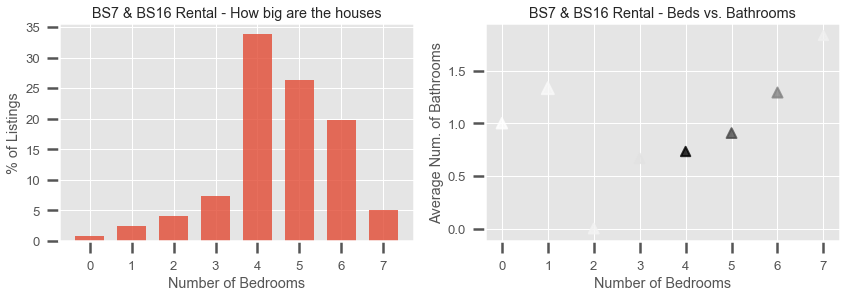

In [17]:
gr.areaOverview(grouped,title)

<h3>Q2: How much landlord should list property for?</h3>

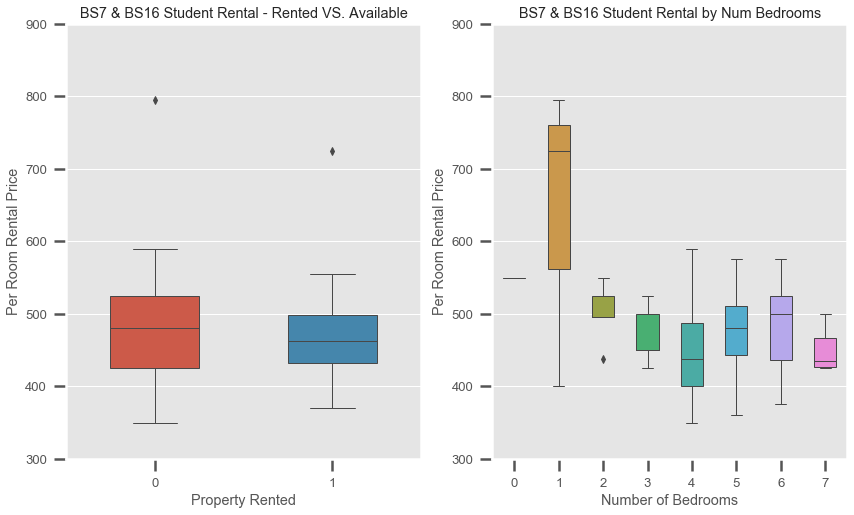

In [18]:
# GRAPH

# graph_a = BA2_stud.plot.scatter('num_bathrooms', 'room_pm', c = 'rented',
#                   colormap = 'rainbow')

# region = student[(student['outcode'] == 'BS7') | (student['outcode'] == 'BS16')]
gr.rentPriceGraphs(region,title,'room_pm',300,900)

<h3>Q3: How much rent would generate by adding extra bathroom?</h3>


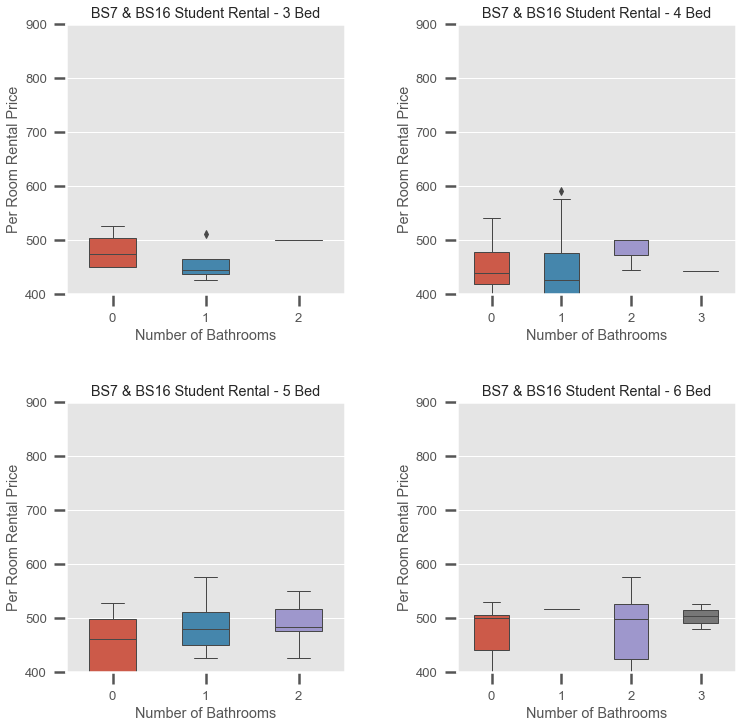

In [19]:
# region = student[(student['outcode'] == 'BA2') | (student['outcode'] == 'BA1')]
gr.rentPriceBedBath(region,title,'room_pm',400,900)

In [22]:
region = student[(student['outcode'] == 'BS7')]
data.getBathroomsByProperSize(region)

,num_bedrooms,num_bathrooms,count,proportion%,rent_pm
0,0,1,1,100.0,550.0
1,1,1,2,66.7,760.0
2,1,2,1,33.3,400.0
3,2,0,5,100.0,495.0
4,3,0,4,44.4,473.5
5,3,1,4,44.4,445.0
6,3,2,1,11.1,500.0
7,4,0,16,39.0,438.0
8,4,1,21,51.2,425.0
9,4,2,3,7.3,500.0




NEXT STEP ->


MONDAY

2) improving model:
- PCA
- cross validation & hyperparameter 

3) more feature engineering: 
- get more Bristol data
- clustering K-means with long & lat
- NLP, TF-IDF then use key words>



TUESDAY -> start with London data

In [154]:
# delete where bathroom is zero

<h3>Model Improve: polynomial interactions</h3>

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [42]:
# Train test split based on random 25%
X = df.drop(columns=['rent_price','listing_id','description','details_url','first_published_date'])
y = df['rent_price']

run = model.ModelTry(X,y)
X_train, X_test, y_train, y_test = run.data_transform()

# polynomial interactions, even degree of 2 is overfitting using both con & categorical
poly = PolynomialFeatures(1)
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

reg_poly = LinearRegression().fit(X_train_poly, y_train)
run.print_results(X_train_poly, X_test_poly, y_train, y_test, reg_poly)

Training r^2 %: 56.712
Testing r^2 %: 62.089
Training MSE (mil): 0.3629817444647255
Testing MSE (mil): 0.34421707386252914


In [178]:
# try poly transofrmation just on the cont variables.
# using continous transformation adds around 10% R2, checkout which ones and add these manually

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# remove "object"-type features and y from `X`
con_features = [ col for col in X.columns if X[col].dtype in ['int64','float64']]
X_train_con = X_train.loc[:,con_features]
X_test_con = X_test.loc[:,con_features]

# Scale the train and test data
scaler = MinMaxScaler()
scaler.fit(X_train_con)

X_train_sca = scaler.transform(X_train_con)
X_test_sca = scaler.transform(X_test_con)

poly = PolynomialFeatures(2)
poly.fit(X_train_sca)

X_train_poly = poly.transform(X_train_sca)
X_test_poly = poly.transform(X_test_sca)


# Create X_cat which contains only the categorical variables
cat_features = [ col for col in X.columns if X[col].dtype == np.object]
X_train_cat = X_train.loc[:,cat_features]
X_test_cat = X_test.loc[:,cat_features]


# OneHotEncode Categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train_cat)

X_train_ohe = ohe.transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

columns = ohe.get_feature_names(input_features=X_train_cat.columns)
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

X_train_all = pd.concat([pd.DataFrame(X_train_poly, columns=poly.get_feature_names(X_train.columns)), cat_train_df], axis = 1)
X_test_all = pd.concat([pd.DataFrame(X_test_poly, columns=poly.get_feature_names(X_train.columns)), cat_test_df], axis = 1)

reg_poly = Lasso(alpha=1).fit(X_train_all, y_train)
run.print_results(X_train_all, X_test_all, y_train, y_test, reg_poly)


Training r^2 %: 76.84
Testing r^2 %: 74.537
Training MSE (mil): 0.1942007930504862
Testing MSE (mil): 0.23119327420015437


In [119]:
model_coef = reg_poly.coef_
model_coef = pd.DataFrame(model_coef, index=X_train_all.columns, columns=['coef_value'])
model_coef['coef_abs'] = model_coef['coef_value'].apply(lambda x: np.abs(x))
model_coef.sort_values('coef_abs', ascending=False).head(40)

,coef_value,coef_abs
latitude num_bathrooms,4622.672855,4622.672855
num_bathrooms,3683.032703,3683.032703
num_bathrooms num_bedrooms,-3063.858334,3063.858334
num_bathrooms outcode,2198.338127,2198.338127
num_bathrooms property_type,-1629.206084,1629.206084
latitude longitude,1340.604605,1340.604605
longitude num_bathrooms,-1219.646078,1219.646078
num_bathrooms^2,-1041.387520,1041.387520
num_bedrooms^2,888.409139,888.409139
latitude outcode,-872.322616,872.322616


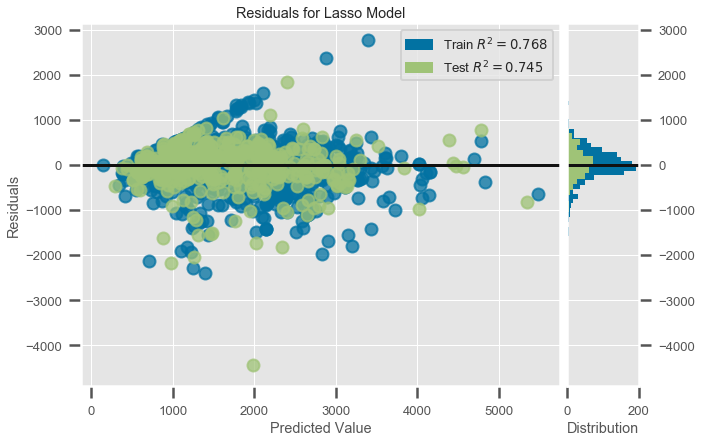

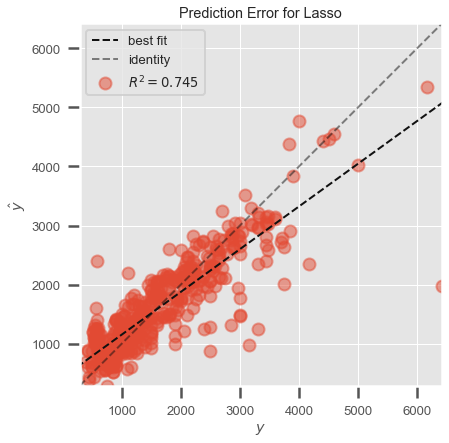

In [121]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot, PredictionError

visualizer = ResidualsPlot(reg_poly, size=(720, 480), alpha=0.5)
visualizer.fit(X_train_all, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_all, y_test)  # Evaluate the model on the test data
visualizer.show();

vis_pred = PredictionError(reg_poly, size=(720, 480), alpha=0.5)
vis_pred.fit(X_train_all, y_train)  # Fit the training data to the visualizer
vis_pred.score(X_test_all, y_test)  # Evaluate the model on the test data
vis_pred.show();

<h3>Model Improve: PCA</h3>

Since we dont have high correlation between the contious variables, and PCA components are hard to interpret. Will skip.

In [139]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_poly)

# X_train_pca = pca.transform(X_train_all)
# X_test_pca = pca.transform(X_test_all)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [137]:
# four components will capture 75%
pca.explained_variance_ratio_+100

array([100.29507811, 100.19780718, 100.15911877, 100.08797584,
       100.06620101, 100.03634147, 100.02752579, 100.01844914,
       100.01768199, 100.01119177, 100.01100529, 100.00836783,
       100.00702552, 100.00667482, 100.00596808, 100.0056384 ,
       100.00424831, 100.00377618, 100.00353927, 100.00268307,
       100.00251116, 100.0021826 , 100.00204316, 100.00179914,
       100.00162904, 100.00133739, 100.00130055, 100.00108751,
       100.0010366 , 100.00093198, 100.00083318, 100.00076162,
       100.00065346, 100.00059452, 100.00052538, 100.00050975,
       100.00046357, 100.00042584, 100.00040212, 100.00035752,
       100.00031172, 100.00027952, 100.00023161, 100.00020173,
       100.00019592, 100.00016828, 100.00016589, 100.00015133,
       100.00012907, 100.00009307, 100.00008307, 100.00006853,
       100.00006522, 100.00005195, 100.00004312, 100.00003082,
       100.00002118, 100.00001216, 100.00000687, 100.00000497,
       100.        , 100.        , 100.        , 100.  

<h3>Model Improve: Cross Validation / Tuning Hyper-parameter</h3>

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import SCORERS


In [187]:
def grid_search(X_train, y_train, model, score = 'r2', cv=10):
    """
    Assumption: takes X, y train data to apply grid search to find best hyperparameter
    based on given score measure.
    :return: best_alpha

    """
    clf = model

    param_grid = [
      {'alpha' : np.linspace(-4, 4, 20)
      }
    ]

    gs_clf = GridSearchCV(clf, param_grid = param_grid, scoring = score, cv=cv, return_train_score=True);
    best_clf = gs_clf.fit(X_train, y_train)

    bmodels = pd.DataFrame(best_clf.cv_results_).sort_values('rank_test_score')

    for i in range(0,3):
        bmodels[f'split{i}_drop'] = bmodels[f'split{i}_train_score']-bmodels[f'split{i}_test_score']

    best_alpha = best_clf.best_params_['alpha']

    return best_alpha, bmodels



In [189]:
best_a, best_models = grid_search(X_train_all, y_train, Lasso())
best_models.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score,split0_drop,split1_drop,split2_drop
10,0.045297,0.004274,0.001294,0.000119,0.210526,{'alpha': 0.21052631578947345},0.693702,0.803531,0.758524,0.674306,...,0.794887,0.790690,0.790763,0.803537,0.785882,0.793176,0.005755,0.106273,-0.015189,0.035854
11,0.034470,0.012069,0.001514,0.000559,0.631579,{'alpha': 0.6315789473684212},0.680860,0.806024,0.756372,0.660856,...,0.779405,0.777888,0.776236,0.790155,0.772073,0.779349,0.006299,0.105671,-0.032127,0.024057
12,0.021865,0.007192,0.001251,0.000137,1.05263,{'alpha': 1.0526315789473681},0.674146,0.797775,0.752113,0.651252,...,0.766732,0.767170,0.763832,0.778834,0.761037,0.768206,0.006460,0.102507,-0.034110,0.016921
13,0.014729,0.007111,0.001126,0.000076,1.47368,{'alpha': 1.473684210526315},0.665451,0.789333,0.743740,0.641319,...,0.752805,0.754055,0.750148,0.765251,0.750468,0.755385,0.006176,0.098144,-0.037651,0.012066
14,0.010048,0.001746,0.001113,0.000054,1.89474,{'alpha': 1.8947368421052628},0.660862,0.780210,0.732576,0.631212,...,0.738063,0.741518,0.735354,0.751449,0.739124,0.741921,0.006357,0.090481,-0.042143,0.009193


In [186]:
np.linspace(-4, 4, 20)
# sorted(SCORERS.keys())

array([-4.        , -3.57894737, -3.15789474, -2.73684211, -2.31578947,
       -1.89473684, -1.47368421, -1.05263158, -0.63157895, -0.21052632,
        0.21052632,  0.63157895,  1.05263158,  1.47368421,  1.89473684,
        2.31578947,  2.73684211,  3.15789474,  3.57894737,  4.        ])